In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
totaldataset = pd.read_csv("drive/My Drive/ocr_data/data.csv")

In [ ]:
import random
# Original dataset has 92,000 rows and 1025 cols
# selection 92000 rows at random for testing for now
a=random.sample(range(0,92000), 92000)
dataset=totaldataset.loc[a]

In [ ]:
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,pixel_0010,pixel_0011,pixel_0012,pixel_0013,pixel_0014,pixel_0015,pixel_0016,pixel_0017,pixel_0018,pixel_0019,pixel_0020,pixel_0021,pixel_0022,pixel_0023,pixel_0024,pixel_0025,pixel_0026,pixel_0027,pixel_0028,pixel_0029,pixel_0030,pixel_0031,pixel_0032,pixel_0033,pixel_0034,pixel_0035,pixel_0036,pixel_0037,pixel_0038,pixel_0039,...,pixel_0985,pixel_0986,pixel_0987,pixel_0988,pixel_0989,pixel_0990,pixel_0991,pixel_0992,pixel_0993,pixel_0994,pixel_0995,pixel_0996,pixel_0997,pixel_0998,pixel_0999,pixel_1000,pixel_1001,pixel_1002,pixel_1003,pixel_1004,pixel_1005,pixel_1006,pixel_1007,pixel_1008,pixel_1009,pixel_1010,pixel_1011,pixel_1012,pixel_1013,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
91815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,digit_9
1462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,character_01_ka
62526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,character_32_patalosaw
46906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,character_24_bha
28729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,character_15_adna


 **Out of the 1025 columns the first 1024 contains the values of the pixels for the images.
The last column contains the character name.**

In [ ]:
# X = The first 1024 columns
X = dataset.iloc[:,:-1]

# y = The last column
y = dataset.iloc[:,-1]

In [ ]:
num_pixels = X.shape[1]
# 46 characters, consonants "ka" to "gya", and the digits 0 to 9
num_classes = 46
# 32x32 = 1024
img_width = 32
img_height = 32
img_depth = 1

In [ ]:
X.shape[0]

92000

In [ ]:
X_images = X.values.reshape(X.shape[0],img_width,img_height)

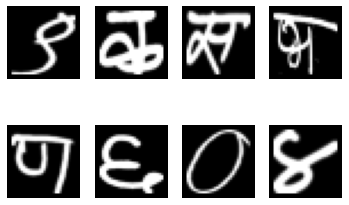

In [ ]:
for i in range(1,9):
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
dataset.iloc[:,1024].value_counts()

character_18_da              2000
character_20_na              2000
character_33_ha              2000
digit_4                      2000
character_23_ba              2000
character_36_gya             2000
digit_1                      2000
character_34_chhya           2000
digit_5                      2000
character_13_daa             2000
character_35_tra             2000
character_29_waw             2000
character_28_la              2000
character_12_thaa            2000
character_22_pha             2000
character_04_gha             2000
digit_0                      2000
character_19_dha             2000
character_01_ka              2000
digit_8                      2000
character_02_kha             2000
character_15_adna            2000
character_07_chha            2000
character_10_yna             2000
character_31_petchiryakha    2000
digit_7                      2000
digit_9                      2000
character_09_jha             2000
character_17_tha             2000
digit_6       

In [ ]:
# Label encoding the results column
from sklearn.preprocessing import LabelBinarizer
binecoder = LabelBinarizer()
Y = binecoder.fit_transform(y)
print(y.iloc[0],Y[0])

digit_9 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]


In [ ]:
dataset.iloc[:,500:525].value_counts()

pixel_0500  pixel_0501  pixel_0502  pixel_0503  pixel_0504  pixel_0505  pixel_0506  pixel_0507  pixel_0508  pixel_0509  pixel_0510  pixel_0511  pixel_0512  pixel_0513  pixel_0514  pixel_0515  pixel_0516  pixel_0517  pixel_0518  pixel_0519  pixel_0520  pixel_0521  pixel_0522  pixel_0523  pixel_0524
0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0             909
                                                                                                                                                                                                                                                                                                1              60
1           0           0           0           0           0           0           0    

In [ ]:
# data normalization
X = X/255

In [ ]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model

In [ ]:
def baseline_model():
    model = Sequential()
    # num_pixels = 1024
    model.add(Dense(num_pixels,
                    input_dim=num_pixels,
                    kernel_initializer='normal',
                    activation='relu'                       
                   ))
    model.add(Dense(num_classes,
                   kernel_initializer='normal',
                   activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    return model

In [ ]:
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 46)                47150     
Total params: 1,096,750
Trainable params: 1,096,750
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 10
batch_size = 200
history = model.fit(X_train.values, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
295/295 - 1s - loss: 1.0850 - accuracy: 0.7124 - val_loss: 0.6313 - val_accuracy: 0.8304
Epoch 2/10
295/295 - 1s - loss: 0.4496 - accuracy: 0.8798 - val_loss: 0.4060 - val_accuracy: 0.8870
Epoch 3/10
295/295 - 1s - loss: 0.2684 - accuracy: 0.9309 - val_loss: 0.3246 - val_accuracy: 0.9065
Epoch 4/10
295/295 - 1s - loss: 0.1793 - accuracy: 0.9542 - val_loss: 0.2858 - val_accuracy: 0.9163
Epoch 5/10
295/295 - 1s - loss: 0.1236 - accuracy: 0.9690 - val_loss: 0.2459 - val_accuracy: 0.9301
Epoch 6/10
295/295 - 1s - loss: 0.0827 - accuracy: 0.9814 - val_loss: 0.2365 - val_accuracy: 0.9311
Epoch 7/10
295/295 - 1s - loss: 0.0584 - accuracy: 0.9873 - val_loss: 0.2342 - val_accuracy: 0.9328
Epoch 8/10
295/295 - 1s - loss: 0.0408 - accuracy: 0.9926 - val_loss: 0.2146 - val_accuracy: 0.9412
Epoch 9/10
295/295 - 1s - loss: 0.0256 - accuracy: 0.9965 - val_loss: 0.2196 - val_accuracy: 0.9374
Epoch 10/10
295/295 - 1s - loss: 0.0186 - accuracy: 0.9978 - val_loss: 0.2084 - val_accuracy: 0.9412

In [ ]:
scores = model.evaluate(X_test.values, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 94.07%


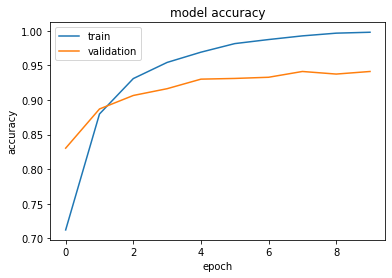

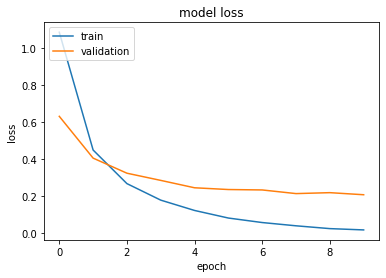

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [ ]:
predictions = model.predict(X_test)
predicted_labels = [np.argmax(i) for i in predictions]
y_test_labels = [np.argmax(i) for i in y_test]

confusoinMatrix = tf.math.confusion_matrix(labels=y_test_labels, predictions=predicted_labels)

In [ ]:
print(classification_report(y_test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       406
           1       0.98      0.90      0.94       349
           2       0.94      0.92      0.93       399
           3       0.92      0.86      0.89       434
           4       0.92      0.93      0.92       409
           5       0.93      0.95      0.94       388
           6       0.94      0.88      0.91       370
           7       0.95      0.95      0.95       408
           8       0.97      0.98      0.97       363
           9       0.90      0.94      0.92       370
          10       0.97      0.96      0.96       372
          11       0.95      0.96      0.95       409
          12       0.93      0.92      0.93       399
          13       0.94      0.96      0.95       432
          14       0.94      0.94      0.94       394
          15       0.96      0.97      0.96       391
          16       0.91      0.88      0.89       384
          17       0.92    

Text(159.0, 0.5, 'Real Values')

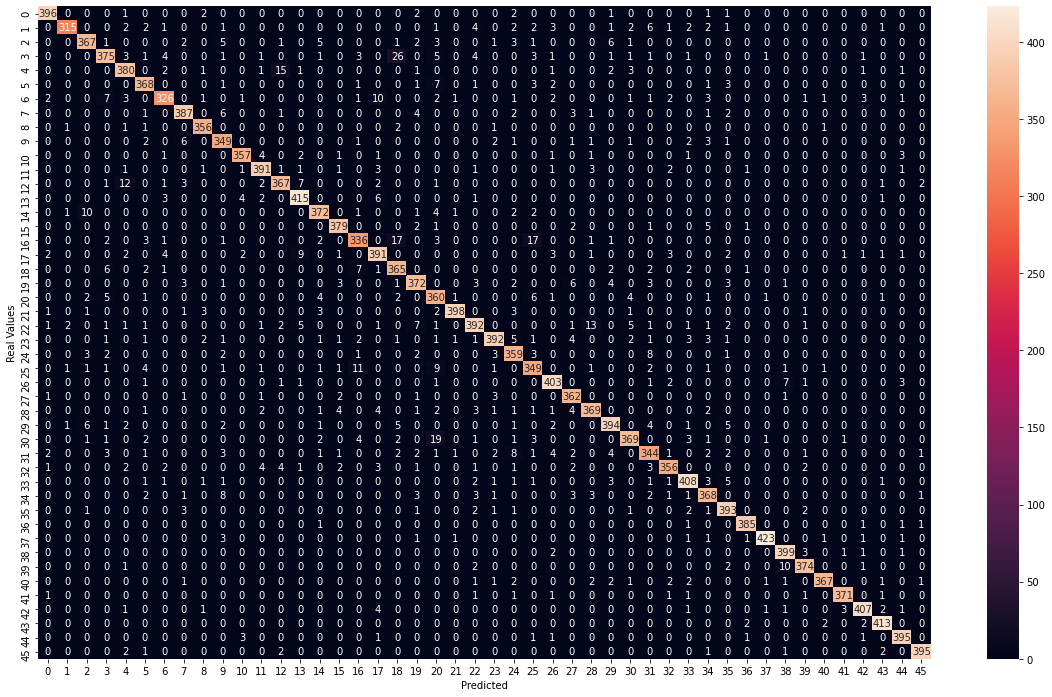

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(confusoinMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real Values')